# Loading and Cleaning Data
First we load in our humble file of NOLA restaurant reviews and ratings

In [1]:
import pandas as pd


data = pd.read_csv("NOLA Restaurants.csv")

Next we preprocess all of our reviews. For this project that entails stripping all punctuation, converting everything to lowercase, and then lemmatising. Stop words were considered for removal, but they help with sentence coherence, so they remain here.

In [2]:
import re
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
  

'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and  characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yahms\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yahms\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
STOPWORDS = nltk.corpus.stopwords.words("english")

data["text_clean"] = data["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_lemm=True, 
          lst_stopwords=None))
data.head(10)

,business_id,name,review_count,avg_stars,review_id,user_id,text,useful,stars,wordcount,train,text_clean
0,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,2u8kIWm1CrMGuwGTW1HBGQ,nn6DoANEtr7SgvWWgrh2oQ,The service is awesome...staff is very friendl...,0,5,32,True,the service is awesomestaff is very friendly a...
1,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,EwarwhOOmnB22qESUv_VPw,G6ZnatT96yzdcX81PZyT3g,New and cool spot in downtown New Orleans!\nGr...,0,5,51,False,new and cool spot in downtown new orleans grea...
2,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,EdsUPECvSzIj503qt13Pwg,dRvKAgf9a0DSKioJSv1p0Q,We went here before a concert. It was super bu...,0,4,60,False,we went here before a concert it wa super busy...
3,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,XEfHuaszNLgeUu-6gXB-qQ,JDOeSXX33nUx4q-AmUFBSw,My friends and I had a great meal at Copper Vi...,0,4,177,True,my friend and i had a great meal at copper vin...
4,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,W7_4Dd6xTuWuTDqe68XBtQ,GCldu8eAzez5rSFpijNZ3A,"What a great concept! 38 wines on tap, oh yeah...",1,5,65,True,what a great concept 38 wine on tap oh yeah th...
5,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,iFSgljVogeJYq44jppE2zQ,ScskFjiX1EwhJritfYHPuQ,Our waitress Rose was amazing. Made me feel li...,0,5,18,True,our waitress rose wa amazing made me feel like...
6,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,PEVRSj1KilCMmxw0l1at1A,4HTjgdTXIK07za49VvfF7A,Best place in the CBD. Rolled in rough around ...,0,5,52,True,best place in the cbd rolled in rough around t...
7,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,b4IUHT-DvIeEneCNx7O0jA,eUVmYjvgSPTojgff5CToXg,"So the waiter was great, the atmosphere was GR...",1,4,132,False,so the waiter wa great the atmosphere wa great...
8,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,dx_dmJDhUrQJ16-Oqp73Eg,FbQiilAZrTValxD_X3cPZw,"I have been here twice, and will continue to c...",1,5,242,False,i have been here twice and will continue to co...
9,YNjyv0gfOr2g8lbmUpTnKg,Copper Vine,350,4.5,Qekf7LisFJNPn6aFzKB-Jg,BqAu7D5qHMQsrlRW8bRl-w,My sister and I ate here last Sunday and it wa...,0,5,37,True,my sister and i ate here last sunday and it wa...


In [4]:
Train = data[data['train']== True]
Test = data[data['train']== False]

From simple tokenization, we see that we have just 12k+ words that occur 25 or more times in the training review dataset. We make a vocabulary of the first 12k, convert every other word to an <OOV> (out of vocabulary) token and lastly pre-pad every review to be 262 words long (the max length of our dataset).

This gives us a training set of some 330k reviews and a testing set of some 110k reviews, all with a standard size of 262 words.

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



tokenizer = Tokenizer(num_words = 3000, oov_token = '<OOV>', split=' ')
tokenizer.fit_on_texts(Train['text_clean'])
len(tokenizer.word_index)

150935

In [7]:
len([t for t in tokenizer.word_counts.values() if int(t) >= 25])

12943

In [8]:
tokenizer = Tokenizer(num_words = 12000, oov_token = '<OOV>', split=' ')
tokenizer.fit_on_texts(Train['text_clean'])
X_train = tokenizer.texts_to_sequences(Train['text_clean'])
X_train = pad_sequences(X_train, padding="pre")

In [9]:
X_test = tokenizer.texts_to_sequences(Test['text_clean'])
X_test = pad_sequences(X_test, maxlen = X_train.shape[1], padding="pre")

In [10]:
print(X_train.shape)
print(X_test.shape)

(334466, 262)
(111487, 262)


In [11]:
Y_test = Test['stars']
Y_train = Train['stars']

In [16]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 150935 unique tokens.


# Text embedding

We're using GloVe's twitter vectors, as they may match up better with yelp slang.
https://nlp.stanford.edu/projects/glove/ (download here!)
The max dimensionality of the embedded vectors is 200-dimensional, which we;ll try to use.


In [14]:
import numpy as np

embeddings_index = {}
f = open('glove.twitter.27B.200d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 1193514 word vectors.


Our embedding matrix takes the 12k words (and OOV token) and associates each with a distinct 200-d vector, with likeminded words having more similar vectors

In [17]:
embedding_matrix = np.zeros((12001, 200))
for word, i in word_index.items():
    if i > 12000:
        break
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [18]:
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional, Permute, multiply, Input
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import keras as K

embedding_layer = Embedding(12001,
                            200,
                            weights=[embedding_matrix],
                            input_length=262,
                            trainable=False)



In [20]:
lstm_out = 128 # Model 1 used 196
batch_size = 128

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.05))
model.add(Bidirectional(LSTM(lstm_out, dropout = 0.05)))
model.add(Dense(64, activation="relu"))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 262, 200)          2400200   
                                                                 
 dropout (Dropout)           (None, 262, 200)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2,753,869
Trainable params: 353,669
Non-trainable params: 2,400,200
________________________________________

We then set up a tuner to evaluate the number of layers (dense and bidirectional LSTM), as well as parameters involving layer size and dropout rate.
We tune each setting for 10 epochs, or until validation accuracy doesn't improve for 5 epochs running.

In [19]:
def build_model(hp):

    model = Sequential()
    model.add(embedding_layer)
    
    num_dense = hp.Int('num_dense', 1, 2)
    num_lstm = hp.Int('n_layers', 1, 2)

    if(num_lstm > 1):
        model.add(Bidirectional(LSTM(hp.Int(f'lstm_0_units',min_value=32,max_value=512,step=32),return_sequences=True)))
        model.add(Bidirectional(LSTM(hp.Int(f'lstm_1_units',min_value=32,max_value=512,step=32),return_sequences=False)))
    else:
        model.add(Bidirectional(LSTM(hp.Int(f'lstm_0_units',min_value=32,max_value=512,step=32),return_sequences=False)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    if( num_dense > 1):
        model.add(Dense(hp.Int(f'dense_units',min_value=32,max_value=512,step=32), activation="relu"))
    model.add(Dense(5,activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer= 'adam',metrics = ['accuracy'])
    print(model.summary())
    return model


In [21]:
import keras_tuner as kt
import IPython

tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials = 15,
    seed=666,
    directory='results',
    overwrite=False
)

stop_early = K.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

#tuner.search(X_train, Y_train, epochs=10, validation_split=0.2, callbacks=[stop_early, ClearTrainingOutput()], batch_size=128, shuffle=True, use_multiprocessing=True, workers=14)



INFO:tensorflow:Reloading Oracle from existing project results\untitled_project\oracle.json
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 262, 200)          2400200   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               59648     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2,460,173
Trainable params: 59,973
Non-trainable params: 2,400,200
_________________________________________________________________
None
INFO:ten

In [22]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [26]:
Y_train = pd.get_dummies(Y_train)
Y_test = pd.get_dummies(Y_test)

np.save(file="X_test.npy",arr=X_test)
np.save(file="X_train.npy",arr=X_train)
np.save(file="Y_test.npy",arr=Y_test)
np.save(file="Y_train.npy",arr=Y_train)

Our best model is then fit for 15 epochs, then refit again from scratch for 4 epochs as further epochs dropped validation accuracy

In [27]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, epochs=15, validation_split=0.2, callbacks=[stop_early],  batch_size=128, shuffle=True, use_multiprocessing=True, workers=14)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 262, 200)          2400200   
                                                                 
 bidirectional_4 (Bidirectio  (None, 262, 832)         2053376   
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               221440    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 325       
                                                                 
Total params: 4,675,341
Trainable params: 2,275,141
No

KeyboardInterrupt: 

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.savefig('lstm_accuracy.png')

NameError: name 'history' is not defined

In [24]:
history.history['val_accuracy']

[0.6883427500724792,
 0.7066553235054016,
 0.7139952778816223,
 0.7175830602645874,
 0.7159087657928467,
 0.7144287824630737,
 0.709465742111206,
 0.7017221450805664,
 0.7005710601806641]

# Final LSTM


In [28]:
def predict_proba(arr):
  processed=[]
  for i in arr:
    processed.append(utils_preprocess_text(i))
  list_tokenized_ex = tokenizer.texts_to_sequences(processed)
  Ex = pad_sequences(list_tokenized_ex, padding="pre", maxlen=262)
  pred=model.predict(Ex)
  #I would recommend rounding temp and 1-temp off to 2 places
  return np.array(pred)

In [29]:
model = build_model(best_hps)
model.fit(X_train, Y_train, epochs=4, validation_split=0.2, callbacks=[stop_early],  batch_size=128, shuffle=True, use_multiprocessing=True, workers=14)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 262, 200)          2400200   
                                                                 
 bidirectional_6 (Bidirectio  (None, 262, 832)         2053376   
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               221440    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 4,675,341
Trainable params: 2,275,141
No

Our final model has the following design:

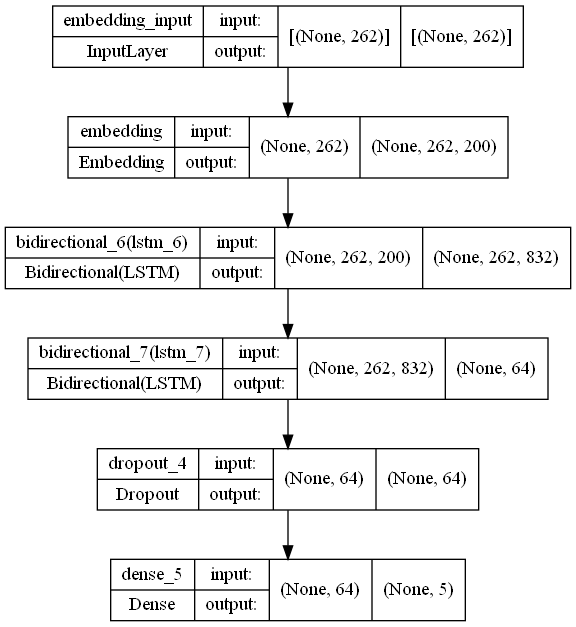

In [30]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [31]:
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = 128)
print("Score: %.2f" % (score))
print("Test Accuracy: %.2f" % (acc))

871/871 [==============================] - 42s 48ms/step - loss: 0.6955 - accuracy: 0.6985
Score: 0.70
Test Accuracy: 0.70


In [32]:
predicted_proba = model.predict(X_test)


We can evaluate how the model is "thinking" in its predictions using the *lime* package. Here we see strongly negative words encourage a 1-star prediction, while several negations of good words (eg not great) help with estimating a negative 2-star review.

In [36]:
ix = 75

from lime.lime_text import LimeTextExplainer
class_names = ['1','2','3','4','5']
explainer= LimeTextExplainer(class_names=class_names)
print("Actual rating:",Test['stars'].iloc[ix])
exp = explainer.explain_instance(Test['text'].iloc[ix],predict_proba, top_labels=2)
exp.show_in_notebook(text=True)

Actual rating: 2


In [ ]:
exp.save_to_file('test_ix_2.html')

In [39]:
i = 0
txt_instance = Train["text_clean"].iloc[i]
txt_instance

'the service is awesomestaff is very friendly and knowledgeable go check it out tried the deviled eggsdevine the fig and goat cheese serrano and margherita flatbread were delicious a well'

In [42]:
print(Train['stars'][i])
print(predicted_prob[i])

5
[3.8394169e-06 4.4465191e-06 2.4688072e-04 4.5907579e-02 9.5383728e-01]


In [92]:
pd.DataFrame(predicted_proba).to_csv("Test_preds/yhat_LSTM.csv")

In [36]:

from matplotlib import pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test,y_scores, classNames):
    classes = len(classNames)
    cm = skm.confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(skm.classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])

    plt.figure(figsize=(40,40))
    sns.set(font_scale=3.0) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")


[[[ 99026   2979]
  [  1828   7654]]

 [[100778   2906]
  [  4725   3078]]

 [[ 94797   4391]
  [  6309   5990]]

 [[ 75111   8708]
  [ 14610  13058]]

 [[ 43533  13719]
  [  5231  49004]]]
              precision    recall  f1-score   support

           1       0.72      0.81      0.76      9482
           2       0.51      0.39      0.45      7803
           3       0.58      0.49      0.53     12299
           4       0.60      0.47      0.53     27668
           5       0.78      0.90      0.84     54235

    accuracy                           0.71    111487
   macro avg       0.64      0.61      0.62    111487
weighted avg       0.69      0.71      0.69    111487

**** Confusion Matrix ****
[[ 7654  1263   332    56   177]
 [ 2208  3078  2121   239   157]
 [  539  1503  5990  3537   730]
 [  105   116  1734 13058 12655]
 [  127    24   204  4876 49004]]
**** Classification Report ****
              precision    recall  f1-score   support

           *       0.72      0.81      0.

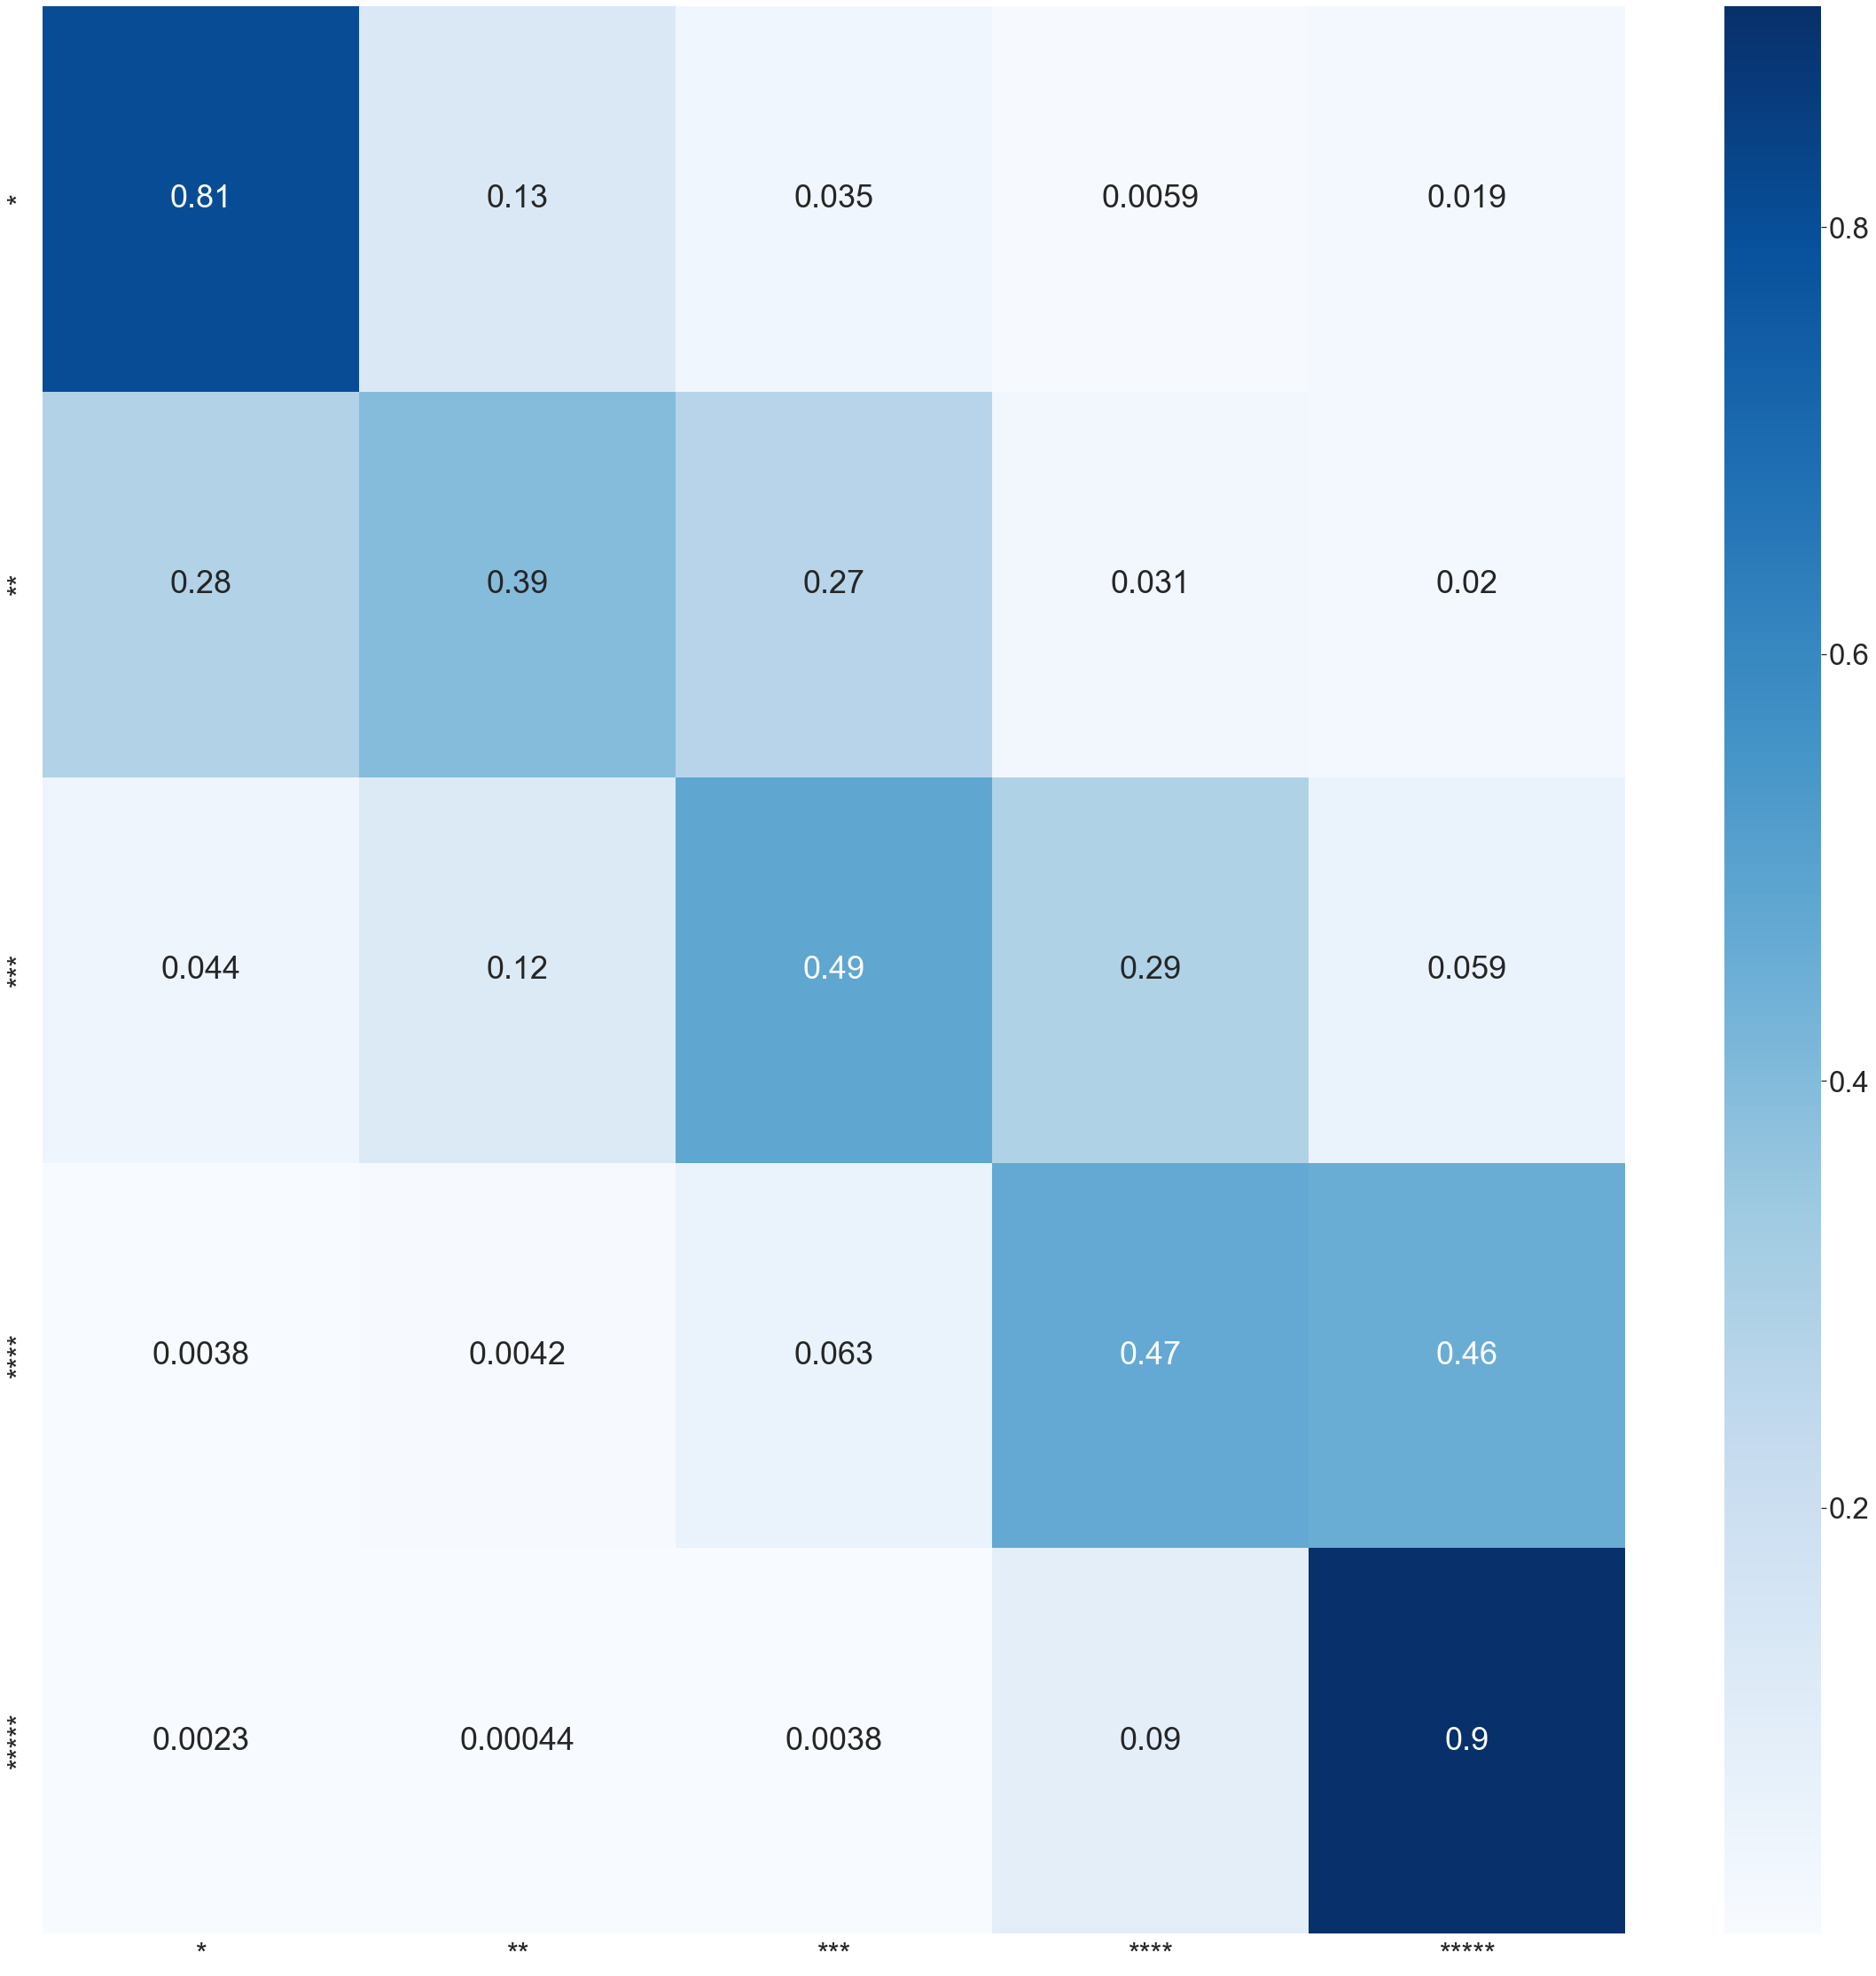

In [90]:
import sklearn.metrics as skm
y_class_pred = predicted_prob.argmax(axis=-1) + 1
cm = skm.multilabel_confusion_matrix(y_true = Test['stars'], y_pred=y_class_pred)
print(cm)
print( skm.classification_report(Test['stars'],y_class_pred))


classNames = ['*', '**', '***', '****', '*****'] 
plot_confusion_matrix(Test['stars'],y_class_pred, classNames) 

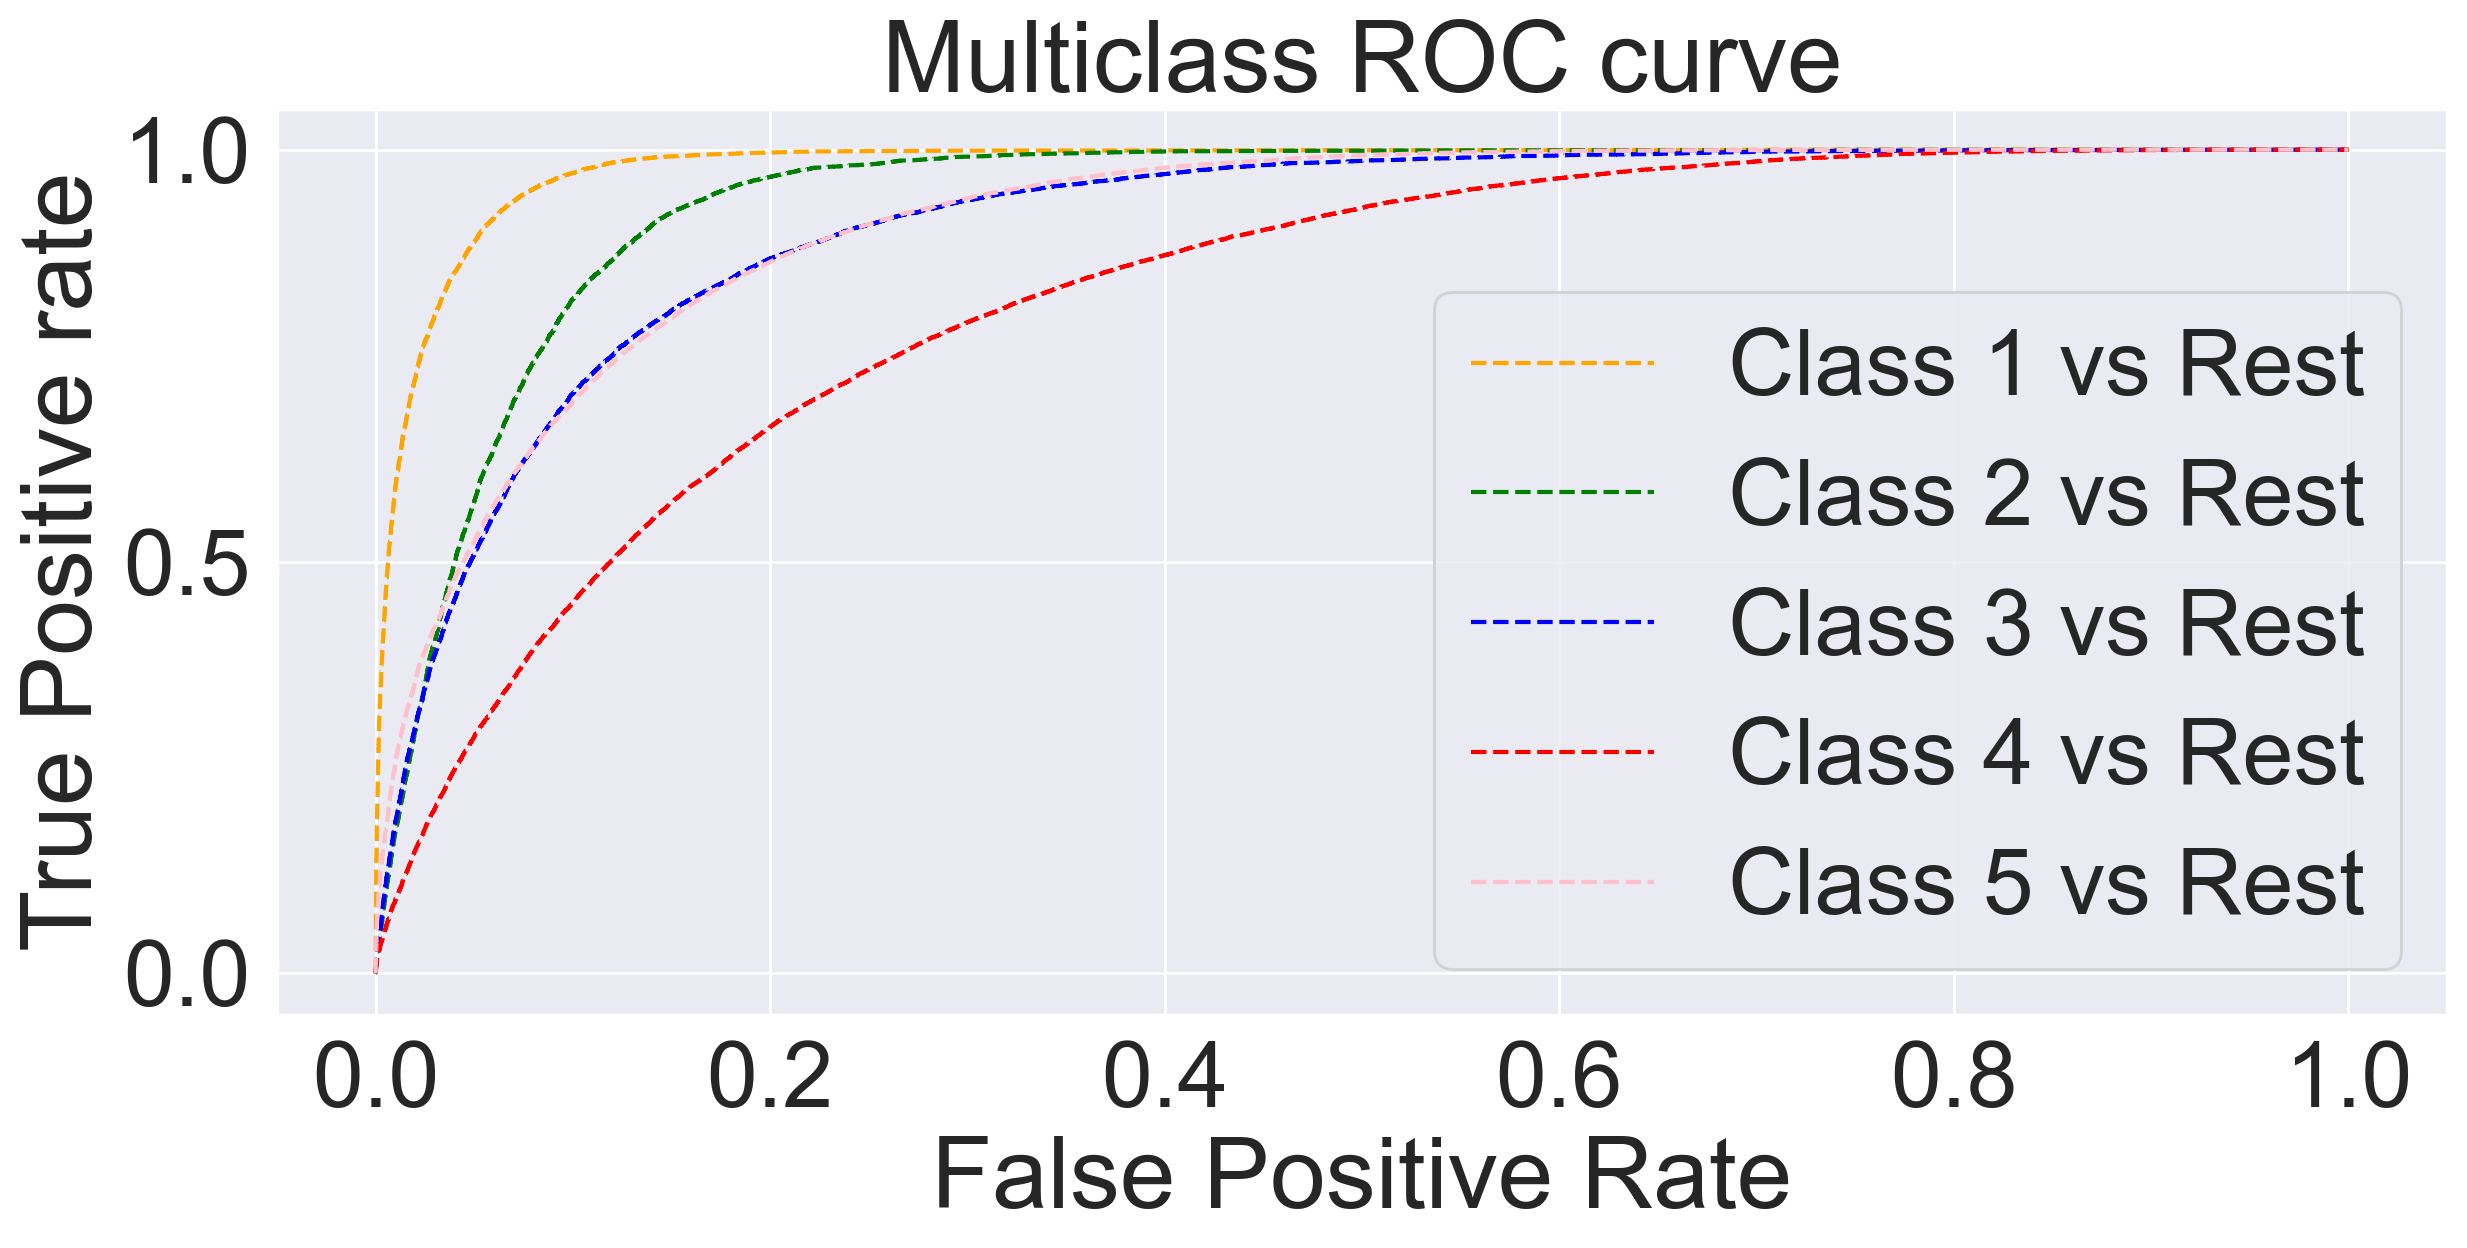

In [203]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

n_class = 5
fpr = {}
tpr = {}
thresh ={}
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Test['stars']-1, predicted_prob[:,i], pos_label=i)
    

from matplotlib.pyplot import figure

figure(figsize=(14, 6), dpi=200)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 4 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=500);    

In [17]:
from tensorflow import keras
model = keras.models.load_model('final_LSTM')


In [150]:
s = tap.predict(X_test)

In [152]:
print(s[:10])
print(predicted_prob[:10])

[[1.3797978e-05 8.5769816e-06 1.5408524e-04 2.8562894e-02 9.7126061e-01]
 [3.1279009e-02 3.2135740e-01 5.5926073e-01 8.4598832e-02 3.5040223e-03]
 [5.0767547e-01 4.2652500e-01 6.1014187e-02 2.7937812e-03 1.9915621e-03]
 [3.2733842e-05 2.1375957e-04 1.3778815e-02 5.3339261e-01 4.5258206e-01]
 [2.0360413e-04 8.2635116e-03 4.1770524e-01 5.4610664e-01 2.7721049e-02]
 [7.8821933e-05 8.4958716e-05 1.7660817e-03 1.4108841e-01 8.5698175e-01]
 [3.7284841e-05 1.6960349e-04 1.0656684e-02 4.5226693e-01 5.3686953e-01]
 [1.1865349e-05 2.9028899e-05 1.3677763e-03 1.6778365e-01 8.3080769e-01]
 [1.0743659e-05 3.7637779e-05 2.4458882e-03 2.7875632e-01 7.1874940e-01]
 [3.0212683e-05 5.1121786e-04 4.6693966e-02 8.3823985e-01 1.1452481e-01]]
[[1.3797978e-05 8.5769816e-06 1.5408524e-04 2.8562894e-02 9.7126061e-01]
 [3.1279009e-02 3.2135740e-01 5.5926073e-01 8.4598832e-02 3.5040223e-03]
 [5.0767547e-01 4.2652500e-01 6.1014187e-02 2.7937812e-03 1.9915621e-03]
 [3.2733842e-05 2.1375957e-04 1.3778815e-02 5.3339

$$IDF_{i} = log \frac{Count~of~Reviews}{Count~of~all~Reviews~with~Term_i}$$

In [50]:
preds = pd.read_csv("Test_preds/yhat_LSTM.csv")
preds = preds.iloc[:,1:]

In [183]:
classes = pd.DataFrame(predicted_prob).idxmax(axis=1)